In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_mse
from enkf_functions import enkf_regressor
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

In [6]:
import time

In [7]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 2000,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [8]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]

Epoch 1. Training MSE: 5.226, Test MSE: 5.231.
Epoch 2. Training MSE: 2.084, Test MSE: 2.079.
Epoch 3. Training MSE: 1.081, Test MSE: 1.072.
Epoch 4. Training MSE: 0.794, Test MSE: 0.798.
Epoch 5. Training MSE: 0.702, Test MSE: 0.724.
Epoch 6. Training MSE: 0.666, Test MSE: 0.702.
Epoch 7. Training MSE: 0.639, Test MSE: 0.677.
Epoch 8. Training MSE: 0.583, Test MSE: 0.619.
Epoch 9. Training MSE: 0.576, Test MSE: 0.612.
Epoch 10. Training MSE: 0.564, Test MSE: 0.602.
Epoch 11. Training MSE: 0.553, Test MSE: 0.587.
Epoch 12. Training MSE: 0.537, Test MSE: 0.57.
Epoch 13. Training MSE: 0.53, Test MSE: 0.561.
Epoch 14. Training MSE: 0.523, Test MSE: 0.554.
Epoch 15. Training MSE: 0.518, Test MSE: 0.549.
Epoch 16. Training MSE: 0.513, Test MSE: 0.545.
Epoch 17. Training MSE: 0.51, Test MSE: 0.541.
Epoch 18. Training MSE: 0.508, Test MSE: 0.538.
Epoch 19. Training MSE: 0.506, Test MSE: 0.535.
Epoch 20. Training MSE: 0.504, Test MSE: 0.533.
Calculation time for 100 particles: 5.10057426293691

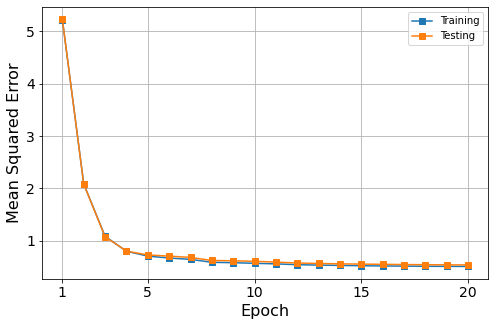

Epoch 1. Training MSE: 5.097, Test MSE: 5.101.
Epoch 2. Training MSE: 2.132, Test MSE: 2.134.
Epoch 3. Training MSE: 1.055, Test MSE: 1.054.
Epoch 4. Training MSE: 0.841, Test MSE: 0.842.
Epoch 5. Training MSE: 0.791, Test MSE: 0.794.
Epoch 6. Training MSE: 0.752, Test MSE: 0.754.
Epoch 7. Training MSE: 0.733, Test MSE: 0.736.
Epoch 8. Training MSE: 0.687, Test MSE: 0.69.
Epoch 9. Training MSE: 0.629, Test MSE: 0.632.
Epoch 10. Training MSE: 0.592, Test MSE: 0.596.
Epoch 11. Training MSE: 0.565, Test MSE: 0.57.
Epoch 12. Training MSE: 0.544, Test MSE: 0.554.
Epoch 13. Training MSE: 0.537, Test MSE: 0.549.
Epoch 14. Training MSE: 0.536, Test MSE: 0.551.
Epoch 15. Training MSE: 0.531, Test MSE: 0.548.
Epoch 16. Training MSE: 0.522, Test MSE: 0.537.
Epoch 17. Training MSE: 0.521, Test MSE: 0.534.
Epoch 18. Training MSE: 0.512, Test MSE: 0.525.
Epoch 19. Training MSE: 0.509, Test MSE: 0.524.
Epoch 20. Training MSE: 0.501, Test MSE: 0.515.
Calculation time for 200 particles: 10.389822701613

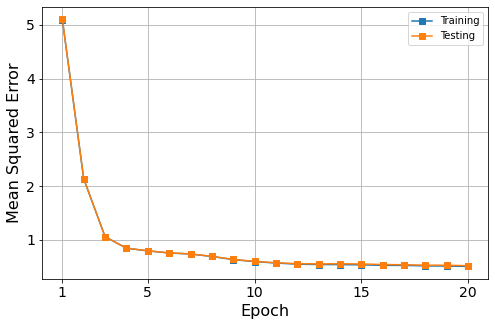

Epoch 1. Training MSE: 5.147, Test MSE: 5.152.
Epoch 2. Training MSE: 2.195, Test MSE: 2.197.
Epoch 3. Training MSE: 1.095, Test MSE: 1.094.
Epoch 4. Training MSE: 0.89, Test MSE: 0.89.
Epoch 5. Training MSE: 0.831, Test MSE: 0.831.
Epoch 6. Training MSE: 0.789, Test MSE: 0.788.
Epoch 7. Training MSE: 0.767, Test MSE: 0.764.
Epoch 8. Training MSE: 0.735, Test MSE: 0.731.
Epoch 9. Training MSE: 0.699, Test MSE: 0.696.
Epoch 10. Training MSE: 0.665, Test MSE: 0.664.
Epoch 11. Training MSE: 0.629, Test MSE: 0.63.
Epoch 12. Training MSE: 0.602, Test MSE: 0.605.
Epoch 13. Training MSE: 0.59, Test MSE: 0.599.
Epoch 14. Training MSE: 0.59, Test MSE: 0.607.
Epoch 15. Training MSE: 0.602, Test MSE: 0.623.
Epoch 16. Training MSE: 0.591, Test MSE: 0.616.
Epoch 17. Training MSE: 0.587, Test MSE: 0.614.
Epoch 18. Training MSE: 0.581, Test MSE: 0.606.
Epoch 19. Training MSE: 0.564, Test MSE: 0.587.
Epoch 20. Training MSE: 0.57, Test MSE: 0.593.
Calculation time for 300 particles: 15.514697162310283 

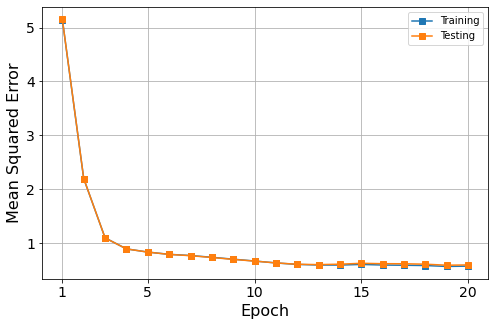

Epoch 1. Training MSE: 5.214, Test MSE: 5.219.
Epoch 2. Training MSE: 2.123, Test MSE: 2.125.
Epoch 3. Training MSE: 1.238, Test MSE: 1.239.
Epoch 4. Training MSE: 0.916, Test MSE: 0.916.
Epoch 5. Training MSE: 0.841, Test MSE: 0.842.
Epoch 6. Training MSE: 0.796, Test MSE: 0.796.
Epoch 7. Training MSE: 0.774, Test MSE: 0.774.
Epoch 8. Training MSE: 0.753, Test MSE: 0.753.
Epoch 9. Training MSE: 0.736, Test MSE: 0.737.
Epoch 10. Training MSE: 0.724, Test MSE: 0.724.
Epoch 11. Training MSE: 0.715, Test MSE: 0.717.
Epoch 12. Training MSE: 0.702, Test MSE: 0.705.
Epoch 13. Training MSE: 0.693, Test MSE: 0.698.
Epoch 14. Training MSE: 0.676, Test MSE: 0.683.
Epoch 15. Training MSE: 0.663, Test MSE: 0.672.
Epoch 16. Training MSE: 0.65, Test MSE: 0.661.
Epoch 17. Training MSE: 0.635, Test MSE: 0.647.
Epoch 18. Training MSE: 0.616, Test MSE: 0.631.
Epoch 19. Training MSE: 0.605, Test MSE: 0.621.
Epoch 20. Training MSE: 0.597, Test MSE: 0.616.
Calculation time for 400 particles: 21.02081447442

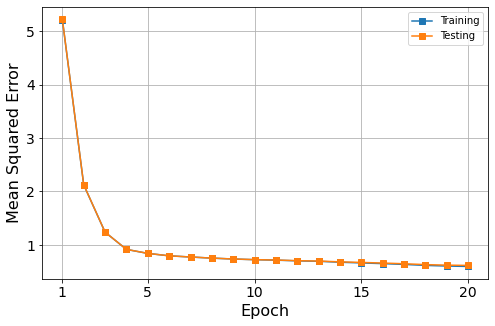

Epoch 1. Training MSE: 5.15, Test MSE: 5.154.
Epoch 2. Training MSE: 2.098, Test MSE: 2.1.
Epoch 3. Training MSE: 1.277, Test MSE: 1.277.
Epoch 4. Training MSE: 0.948, Test MSE: 0.948.
Epoch 5. Training MSE: 0.845, Test MSE: 0.845.
Epoch 6. Training MSE: 0.787, Test MSE: 0.788.
Epoch 7. Training MSE: 0.753, Test MSE: 0.755.
Epoch 8. Training MSE: 0.722, Test MSE: 0.726.
Epoch 9. Training MSE: 0.699, Test MSE: 0.705.
Epoch 10. Training MSE: 0.682, Test MSE: 0.689.
Epoch 11. Training MSE: 0.666, Test MSE: 0.674.
Epoch 12. Training MSE: 0.65, Test MSE: 0.66.
Epoch 13. Training MSE: 0.636, Test MSE: 0.649.
Epoch 14. Training MSE: 0.621, Test MSE: 0.637.
Epoch 15. Training MSE: 0.609, Test MSE: 0.629.
Epoch 16. Training MSE: 0.6, Test MSE: 0.622.
Epoch 17. Training MSE: 0.595, Test MSE: 0.62.
Epoch 18. Training MSE: 0.599, Test MSE: 0.627.
Epoch 19. Training MSE: 0.611, Test MSE: 0.641.
Epoch 20. Training MSE: 0.633, Test MSE: 0.666.
Calculation time for 500 particles: 26.833424317836762 mi

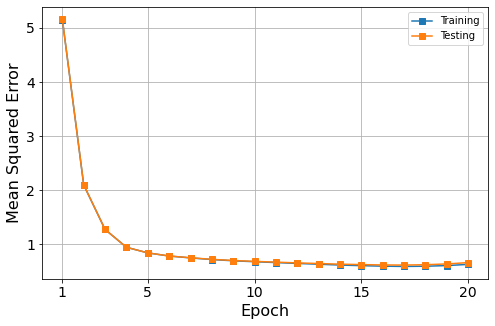

Epoch 1. Training MSE: 5.212, Test MSE: 5.217.
Epoch 2. Training MSE: 2.181, Test MSE: 2.183.
Epoch 3. Training MSE: 1.39, Test MSE: 1.39.
Epoch 4. Training MSE: 1.014, Test MSE: 1.014.
Epoch 5. Training MSE: 0.91, Test MSE: 0.91.
Epoch 6. Training MSE: 0.85, Test MSE: 0.85.
Epoch 7. Training MSE: 0.817, Test MSE: 0.817.
Epoch 8. Training MSE: 0.791, Test MSE: 0.791.
Epoch 9. Training MSE: 0.772, Test MSE: 0.772.
Epoch 10. Training MSE: 0.759, Test MSE: 0.76.
Epoch 11. Training MSE: 0.741, Test MSE: 0.742.
Epoch 12. Training MSE: 0.726, Test MSE: 0.728.
Epoch 13. Training MSE: 0.714, Test MSE: 0.717.
Epoch 14. Training MSE: 0.699, Test MSE: 0.702.
Epoch 15. Training MSE: 0.681, Test MSE: 0.685.
Epoch 16. Training MSE: 0.667, Test MSE: 0.671.
Epoch 17. Training MSE: 0.653, Test MSE: 0.659.
Epoch 18. Training MSE: 0.64, Test MSE: 0.647.
Epoch 19. Training MSE: 0.626, Test MSE: 0.636.
Epoch 20. Training MSE: 0.613, Test MSE: 0.625.
Calculation time for 600 particles: 32.37515005668004 min

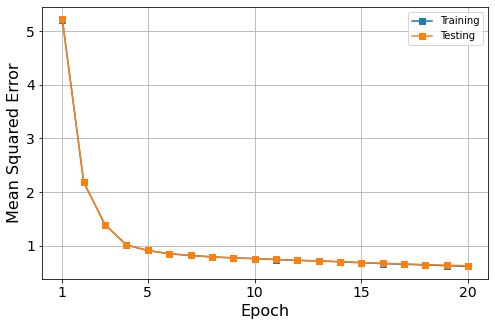

Epoch 1. Training MSE: 5.333, Test MSE: 5.338.
Epoch 2. Training MSE: 2.27, Test MSE: 2.272.
Epoch 3. Training MSE: 1.457, Test MSE: 1.458.
Epoch 4. Training MSE: 1.064, Test MSE: 1.065.
Epoch 5. Training MSE: 0.942, Test MSE: 0.943.
Epoch 6. Training MSE: 0.869, Test MSE: 0.87.
Epoch 7. Training MSE: 0.834, Test MSE: 0.835.
Epoch 8. Training MSE: 0.807, Test MSE: 0.808.
Epoch 9. Training MSE: 0.788, Test MSE: 0.789.
Epoch 10. Training MSE: 0.777, Test MSE: 0.779.
Epoch 11. Training MSE: 0.763, Test MSE: 0.765.
Epoch 12. Training MSE: 0.753, Test MSE: 0.756.
Epoch 13. Training MSE: 0.745, Test MSE: 0.748.
Epoch 14. Training MSE: 0.737, Test MSE: 0.74.
Epoch 15. Training MSE: 0.724, Test MSE: 0.728.
Epoch 16. Training MSE: 0.719, Test MSE: 0.723.
Epoch 17. Training MSE: 0.712, Test MSE: 0.717.
Epoch 18. Training MSE: 0.705, Test MSE: 0.711.
Epoch 19. Training MSE: 0.699, Test MSE: 0.705.
Epoch 20. Training MSE: 0.692, Test MSE: 0.7.
Calculation time for 700 particles: 38.41728502511978 

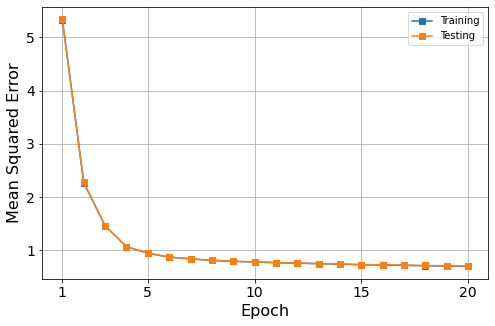

Epoch 1. Training MSE: 5.228, Test MSE: 5.233.
Epoch 2. Training MSE: 2.189, Test MSE: 2.192.
Epoch 3. Training MSE: 1.43, Test MSE: 1.431.
Epoch 4. Training MSE: 1.043, Test MSE: 1.044.
Epoch 5. Training MSE: 0.928, Test MSE: 0.929.
Epoch 6. Training MSE: 0.856, Test MSE: 0.857.
Epoch 7. Training MSE: 0.827, Test MSE: 0.829.
Epoch 8. Training MSE: 0.806, Test MSE: 0.808.
Epoch 9. Training MSE: 0.793, Test MSE: 0.795.
Epoch 10. Training MSE: 0.784, Test MSE: 0.787.
Epoch 11. Training MSE: 0.776, Test MSE: 0.778.
Epoch 12. Training MSE: 0.77, Test MSE: 0.773.
Epoch 13. Training MSE: 0.766, Test MSE: 0.769.
Epoch 14. Training MSE: 0.761, Test MSE: 0.765.
Epoch 15. Training MSE: 0.756, Test MSE: 0.759.
Epoch 16. Training MSE: 0.752, Test MSE: 0.756.
Epoch 17. Training MSE: 0.748, Test MSE: 0.753.
Epoch 18. Training MSE: 0.744, Test MSE: 0.749.
Epoch 19. Training MSE: 0.739, Test MSE: 0.744.
Epoch 20. Training MSE: 0.734, Test MSE: 0.739.
Calculation time for 800 particles: 44.198457022507

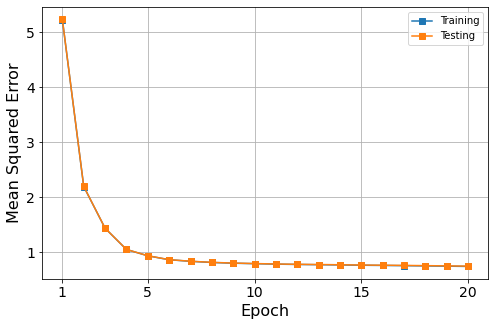

Epoch 1. Training MSE: 5.344, Test MSE: 5.349.
Epoch 2. Training MSE: 2.279, Test MSE: 2.281.
Epoch 3. Training MSE: 1.63, Test MSE: 1.632.
Epoch 4. Training MSE: 1.196, Test MSE: 1.197.
Epoch 5. Training MSE: 1.045, Test MSE: 1.046.
Epoch 6. Training MSE: 0.943, Test MSE: 0.944.
Epoch 7. Training MSE: 0.9, Test MSE: 0.902.
Epoch 8. Training MSE: 0.867, Test MSE: 0.869.
Epoch 9. Training MSE: 0.844, Test MSE: 0.846.
Epoch 10. Training MSE: 0.831, Test MSE: 0.833.
Epoch 11. Training MSE: 0.818, Test MSE: 0.819.
Epoch 12. Training MSE: 0.809, Test MSE: 0.811.
Epoch 13. Training MSE: 0.802, Test MSE: 0.804.
Epoch 14. Training MSE: 0.796, Test MSE: 0.798.
Epoch 15. Training MSE: 0.786, Test MSE: 0.788.
Epoch 16. Training MSE: 0.781, Test MSE: 0.783.
Epoch 17. Training MSE: 0.776, Test MSE: 0.778.
Epoch 18. Training MSE: 0.773, Test MSE: 0.776.
Epoch 19. Training MSE: 0.772, Test MSE: 0.774.
Epoch 20. Training MSE: 0.769, Test MSE: 0.772.
Calculation time for 900 particles: 51.8835479696591

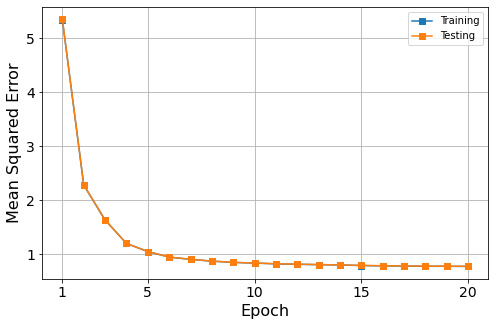

Epoch 1. Training MSE: 5.307, Test MSE: 5.312.
Epoch 2. Training MSE: 2.214, Test MSE: 2.217.
Epoch 3. Training MSE: 1.597, Test MSE: 1.599.
Epoch 4. Training MSE: 1.198, Test MSE: 1.199.
Epoch 5. Training MSE: 1.049, Test MSE: 1.05.
Epoch 6. Training MSE: 0.95, Test MSE: 0.951.
Epoch 7. Training MSE: 0.91, Test MSE: 0.91.
Epoch 8. Training MSE: 0.879, Test MSE: 0.88.
Epoch 9. Training MSE: 0.858, Test MSE: 0.858.
Epoch 10. Training MSE: 0.843, Test MSE: 0.844.
Epoch 11. Training MSE: 0.831, Test MSE: 0.831.
Epoch 12. Training MSE: 0.822, Test MSE: 0.823.
Epoch 13. Training MSE: 0.817, Test MSE: 0.817.
Epoch 14. Training MSE: 0.811, Test MSE: 0.811.
Epoch 15. Training MSE: 0.798, Test MSE: 0.799.
Epoch 16. Training MSE: 0.791, Test MSE: 0.791.
Epoch 17. Training MSE: 0.785, Test MSE: 0.785.
Epoch 18. Training MSE: 0.78, Test MSE: 0.78.
Epoch 19. Training MSE: 0.778, Test MSE: 0.779.
Epoch 20. Training MSE: 0.776, Test MSE: 0.776.
Calculation time for 1000 particles: 53.58654625018438 m

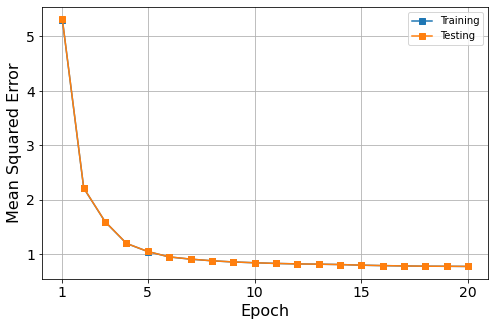

Epoch 1. Training MSE: 5.327, Test MSE: 5.332.
Epoch 2. Training MSE: 2.362, Test MSE: 2.365.
Epoch 3. Training MSE: 1.795, Test MSE: 1.797.
Epoch 4. Training MSE: 1.256, Test MSE: 1.258.
Epoch 5. Training MSE: 1.073, Test MSE: 1.074.
Epoch 6. Training MSE: 0.964, Test MSE: 0.964.
Epoch 7. Training MSE: 0.927, Test MSE: 0.928.
Epoch 8. Training MSE: 0.895, Test MSE: 0.895.
Epoch 9. Training MSE: 0.871, Test MSE: 0.871.
Epoch 10. Training MSE: 0.858, Test MSE: 0.859.
Epoch 11. Training MSE: 0.844, Test MSE: 0.845.
Epoch 12. Training MSE: 0.839, Test MSE: 0.839.
Epoch 13. Training MSE: 0.834, Test MSE: 0.834.
Epoch 14. Training MSE: 0.83, Test MSE: 0.83.
Epoch 15. Training MSE: 0.821, Test MSE: 0.821.
Epoch 16. Training MSE: 0.817, Test MSE: 0.817.
Epoch 17. Training MSE: 0.813, Test MSE: 0.813.
Epoch 18. Training MSE: 0.81, Test MSE: 0.81.
Epoch 19. Training MSE: 0.811, Test MSE: 0.811.
Epoch 20. Training MSE: 0.807, Test MSE: 0.808.
Calculation time for 1500 particles: 83.5070504228274

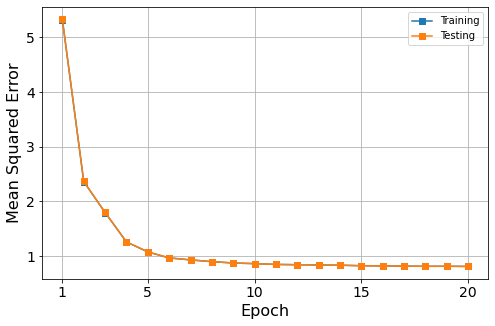

Epoch 1. Training MSE: 5.239, Test MSE: 5.243.
Epoch 2. Training MSE: 2.288, Test MSE: 2.29.
Epoch 3. Training MSE: 1.837, Test MSE: 1.839.
Epoch 4. Training MSE: 1.353, Test MSE: 1.355.
Epoch 5. Training MSE: 1.108, Test MSE: 1.109.
Epoch 6. Training MSE: 0.984, Test MSE: 0.985.
Epoch 7. Training MSE: 0.942, Test MSE: 0.943.
Epoch 8. Training MSE: 0.905, Test MSE: 0.906.
Epoch 9. Training MSE: 0.875, Test MSE: 0.876.
Epoch 10. Training MSE: 0.858, Test MSE: 0.859.
Epoch 11. Training MSE: 0.841, Test MSE: 0.842.
Epoch 12. Training MSE: 0.832, Test MSE: 0.833.
Epoch 13. Training MSE: 0.826, Test MSE: 0.827.
Epoch 14. Training MSE: 0.821, Test MSE: 0.822.
Epoch 15. Training MSE: 0.809, Test MSE: 0.81.
Epoch 16. Training MSE: 0.804, Test MSE: 0.806.
Epoch 17. Training MSE: 0.801, Test MSE: 0.802.
Epoch 18. Training MSE: 0.799, Test MSE: 0.8.
Epoch 19. Training MSE: 0.801, Test MSE: 0.802.
Epoch 20. Training MSE: 0.799, Test MSE: 0.8.
Calculation time for 2000 particles: 118.23935148715972

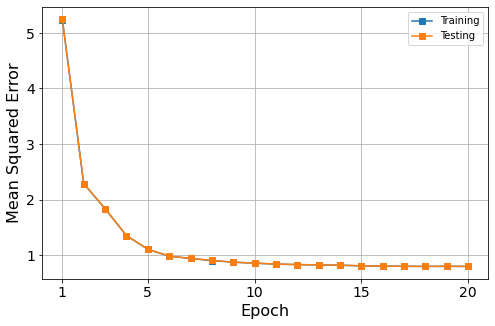

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model = enkf_regressor(X_train,
                                X_test,
                                y_train,
                                y_test,
                                layers,
                                neurons,
                                setting_dict,
                                save_all = True,
                                file_var = "../objects/wine/wine_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                file_model = "../models/wine/wine_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_mse(mean_model,
                mse_mean = None,
                start_epoch = 1,
                savefig = True,
                file = "../img/wine/wine_enkf_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
obj_dict = load_objects("../objects/wine/wine_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
final_model = nn_load("../models/wine/wine_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))